In [1]:
import numpy as np
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.layers import Dense,Activation,Flatten,Input,Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.utils import np_utils
import random

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
data=np.load('data.npy')
target=np.load('target.npy')

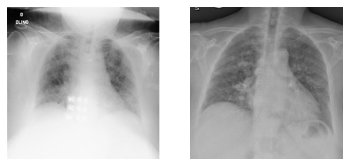

In [3]:
plt.subplot(121)
plt.axis("off")
plt.imshow(data[0])
plt.subplot(122)
plt.axis("off")
plt.imshow(data[1])

In [4]:
data.shape

(392, 224, 224, 3)

In [5]:
target.shape

(392,)

In [6]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))

C:\Users\LENOVO\anaconda3\envs\tensorflow_env\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [7]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [8]:
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(1,activation='sigmoid')(d1)

model_new = Model(inputs=model.input, outputs= fc2)
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [9]:
adam = Adam(lr=0.00003)
model_new.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
for ix in range(len(model_new.layers)):
    print(ix, model_new.layers[ix])

0 <keras.engine.input_layer.InputLayer object at 0x00000184664AAD68>
1 <keras.layers.convolutional.ZeroPadding2D object at 0x000001846430F6A0>
2 <keras.layers.convolutional.Conv2D object at 0x00000184643D96A0>
3 <keras.layers.normalization.BatchNormalization object at 0x00000184664BDE48>
4 <keras.layers.core.Activation object at 0x00000184664FA748>
5 <keras.layers.convolutional.ZeroPadding2D object at 0x000001846650E940>
6 <keras.layers.pooling.MaxPooling2D object at 0x00000184664BDB70>
7 <keras.layers.convolutional.Conv2D object at 0x00000184664D9DD8>
8 <keras.layers.normalization.BatchNormalization object at 0x00000184665A6B70>
9 <keras.layers.core.Activation object at 0x00000184665A6A90>
10 <keras.layers.convolutional.Conv2D object at 0x00000184665A6F98>
11 <keras.layers.normalization.BatchNormalization object at 0x00000184665A6DA0>
12 <keras.layers.core.Activation object at 0x00000184665CDC18>
13 <keras.layers.convolutional.Conv2D object at 0x00000184665EBF28>
14 <keras.layers.conv

In [11]:
for ix in range(140):
    model_new.layers[ix].trainable = False
    
model_new.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model_new.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

                                                                 bn3a_branch1[0][0]               
__________________________________________________________________________________________________
activation_13 (Activation)      (None, 28, 28, 512)  0           add_4[0][0]                      
__________________________________________________________________________________________________
res3b_branch2a (Conv2D)         (None, 28, 28, 128)  65664       activation_13[0][0]              
__________________________________________________________________________________________________
bn3b_branch2a (BatchNormalizati (None, 28, 28, 128)  512         res3b_branch2a[0][0]             
__________________________________________________________________________________________________
activation_14 (Activation)      (None, 28, 28, 128)  0           bn3b_branch2a[0][0]              
__________________________________________________________________________________________________
res3b_bran

In [12]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [13]:

hist = model_new.fit(train_data,train_target,
                    shuffle = True,
                    batch_size = 16,
                    epochs = 5,
                    validation_split=0.20
                    )

Train on 281 samples, validate on 71 samples
Epoch 1/5
281/281 [==============================] - 96s 342ms/step - loss: 0.5020 - accuracy: 0.7473 - val_loss: 0.7694 - val_accuracy: 0.5211
Epoch 2/5
281/281 [==============================] - 89s 315ms/step - loss: 0.1358 - accuracy: 0.9751 - val_loss: 0.7173 - val_accuracy: 0.5211
Epoch 3/5
281/281 [==============================] - 89s 316ms/step - loss: 0.0629 - accuracy: 0.9929 - val_loss: 0.7010 - val_accuracy: 0.5211
Epoch 4/5
281/281 [==============================] - 90s 321ms/step - loss: 0.0492 - accuracy: 0.9858 - val_loss: 0.6913 - val_accuracy: 0.5211
Epoch 5/5
281/281 [==============================] - 88s 315ms/step - loss: 0.0451 - accuracy: 0.9929 - val_loss: 0.6900 - val_accuracy: 0.6338


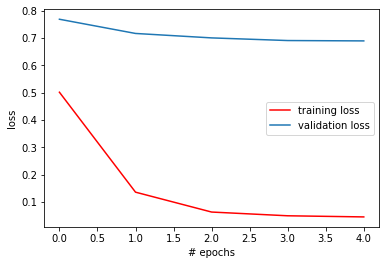

In [14]:
plt.plot(hist.history['loss'],'r',label='training loss')
plt.plot(hist.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

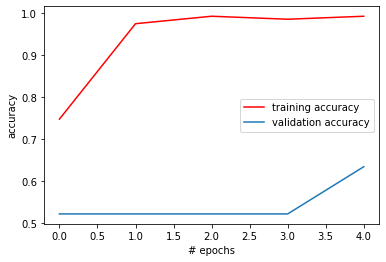

In [15]:
plt.plot(hist.history['accuracy'],'r',label='training accuracy')
plt.plot(hist.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [16]:
print(model_new.evaluate(test_data,test_target))

40/40 [==============================] - 8s 198ms/step
[0.6890794038772583, 0.625]


In [17]:
from sklearn import metrics

In [18]:
y_pred=model_new.predict(test_data)
y_pred=y_pred.reshape(-1)

In [19]:
test_data.shape

(40, 224, 224, 3)

In [20]:
final_pred=[]
for i in range(y_pred.shape[0]):
    if y_pred[i]<=0.5:
        final_pred.append(0)
    else:
        final_pred.append(1)

In [21]:
final_pred=np.array(final_pred)

In [22]:
import itertools

In [23]:
final_pred.shape

(40,)

In [24]:
print(test_target.shape)
print(final_pred.shape)

(40,)
(40,)


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_target, final_pred)

In [26]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [27]:
cm_plot_labels = ['covid_positive','covid_negative']

Confusion matrix, without normalization
[[ 5 14]
 [ 1 20]]


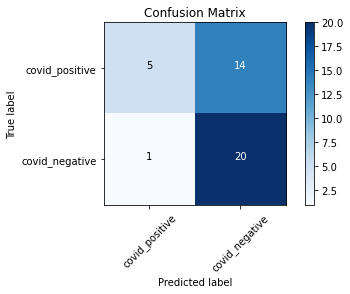

In [28]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [29]:
from sklearn.metrics import classification_report
target_names=['class 0','class 1']
print(classification_report(test_target,final_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.26      0.40        19
     class 1       0.59      0.95      0.73        21

    accuracy                           0.62        40
   macro avg       0.71      0.61      0.56        40
weighted avg       0.70      0.62      0.57        40



In [30]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

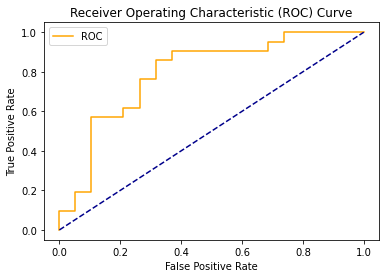

In [32]:
from sklearn.metrics import roc_curve
fper, tper, threshold = roc_curve(test_target, y_pred)
plot_roc_cur(fper, tper)

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_target,y_pred)

0.7919799498746868